In [ ]:
# Author : Raude Killian
# Last modified 17.07.205

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
mne.set_log_level('ERROR')


In [2]:
# For tests purposes
subID = "F103"
part = "part1"
session = "encoding"
channel = "MEG0623"

plots_folder = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\plots\{subID}"
intermediates_folder = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\meg_intermediates\{subID}"
os.makedirs(plots_folder, exist_ok=True)
raw_meg_filename = rf"L:\Common\Users\Qiaoyue\MEG_project\Data\{subID}\MEG\{part}.fif"
sss_meg_filename = rf"{intermediates_folder}/{subID}_{session}_sss.fif"
ica_meg_filename = rf"{intermediates_folder}/{subID}_{session}_icaed.fif"

In [3]:
raw_meg_file = mne.io.read_raw_fif(raw_meg_filename, preload=True, verbose=False)
#raw_meg_file.get_data(picks = channel)
sss_meg_file = mne.io.read_raw_fif(sss_meg_filename, preload=True, verbose=False)
#sss_meg_file.get_data(picks = channel)
ica_meg_file = mne.io.read_raw_fif(ica_meg_filename, preload=True, verbose=False)
#ica_meg_file.get_data(picks = channel)

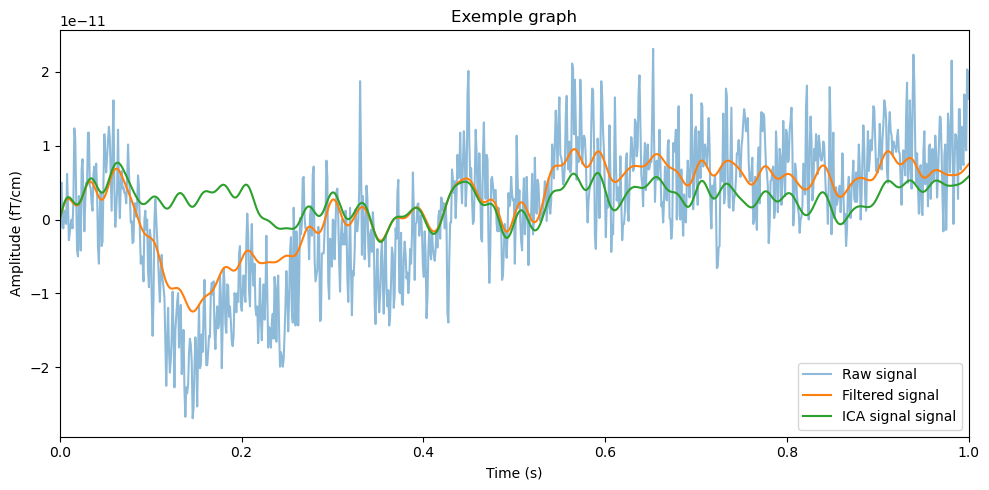

In [4]:
f = 1000
start = 0 * f
stop = 1 * f
max_stop = 1547000
raw_data = raw_meg_file.get_data(picks = channel, start = start, stop = stop)[0]
sss_data = sss_meg_file.get_data(picks = channel, start = start, stop = stop)[0]
ica_data = ica_meg_file.get_data(picks = channel, start = start, stop = stop)[0]
time = np.linspace(start, stop, len(raw_data))/f
plt.figure(figsize=(10, 5))

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (fT/cm)')
plt.title(f"Exemple graph")
plt.xlim(start,stop/f)
plt.plot(time,raw_data, label = "Raw signal", alpha = 0.5)
plt.plot(time,sss_data, label = "Filtered signal")
plt.plot(time,ica_data, label = "ICA signal signal")
plt.legend()
plt.tight_layout()
fig_path = os.path.join(plots_folder, f"processing_effect.png")
plt.savefig(fig_path, dpi=600)
plt.show()




In [5]:
#raw_meg_file.info['bads'] = ['MEG1041'] 
#raw_meg_file.drop_channels(raw_meg_file.info['bads'])

n_fft = 2000

PSD_data = raw_meg_file.compute_psd(method="welch", fmin=1, fmax=60, picks="grad", n_fft=n_fft, n_overlap=int(n_fft/2), verbose = False)
fig = PSD_data.plot(show=True) 
fig.suptitle(f"Power Spectral Density: {subID}_{session} Raw", fontsize=16)
fig.savefig(f"{plots_folder}/{subID}_{session}_Raw.png", dpi = 600)
plt.close(fig)



In [6]:
data1PSD = sss_meg_file.compute_psd(method="welch", fmin=1, fmax=60, picks="grad", n_fft=n_fft, n_overlap=int(n_fft/2), verbose = False)
fig = data1PSD.plot(show=True) 
fig.suptitle(f"Power Spectral Density: {subID}_{session} SSS", fontsize=16)
fig.savefig(f"{plots_folder}/{subID}_{session}_SSS.png", dpi = 600)
plt.close(fig)

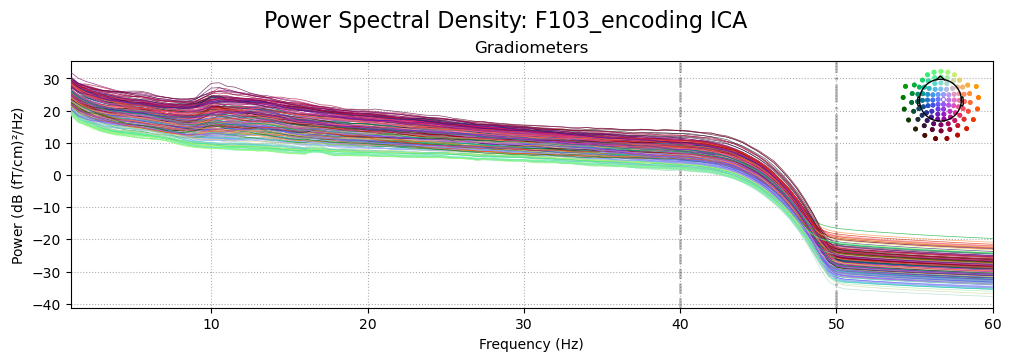

In [7]:
icaPSD = ica_meg_file.compute_psd(method="welch", fmin=1, fmax=60, picks="grad", n_fft=n_fft, n_overlap=int(n_fft/2), verbose = False)
fig = icaPSD.plot(show=True) 
fig.suptitle(f"Power Spectral Density: {subID}_{session} ICA", fontsize=16)
fig.savefig(f"{plots_folder}/{subID}_{session}_ICA.png", dpi = 600)
plt.show(fig)
plt.close(fig)

In [11]:
icaPSD

Data type,Power Spectrum
Units,grad: (T/m)²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,204
Number of frequency bins,119
Frequency range,1.00 – 60.00 Hz


In [ ]:
#can 'plot diff between sss and ica to better see diff on frontal sensors

In [14]:
import mne
import matplotlib.pyplot as plt
import numpy as np

# Compute PSDs for two Raw objects (e.g., before and after cleaning)
#data1PSD, freqs = mne.time_frequency.psd_welch(sss_meg_file, fmin=1, fmax=40, verbose=False)
#icaPSD, _     = mne.time_frequency.psd_welch(ica_meg_file, fmin=1, fmax=40, verbose=False)

# Compute log-PSD for better scaling
log_data1PSD = np.log10(data1PSD)
log_icaPSD = np.log10(icaPSD)

# Compute channel-wise PSD difference (in log scale)
log_diff = log_data1PSD - log_icaPSD  # shape: (n_channels, n_freqs)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each channel as a line
for ch_idx, ch_name in enumerate(sss_meg_file.ch_names):
    ax.plot(log_diff[ch_idx], label=ch_name, alpha=0.6)

ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Log PSD difference (before - after)')
ax.set_title('Channel-wise PSD Difference')
ax.grid(True)

# Optional: add legend if only a few channels
# ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


TypeError: loop of ufunc does not support argument 0 of type Spectrum which has no callable log10 method

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(log_diff, xticklabels=20, yticklabels=raw1.ch_names,
            cmap='RdBu_r', center=0)
plt.xlabel('Frequency bins')
plt.ylabel('Channels')
plt.title('PSD Difference Heatmap (log10 scale)')
plt.show()
